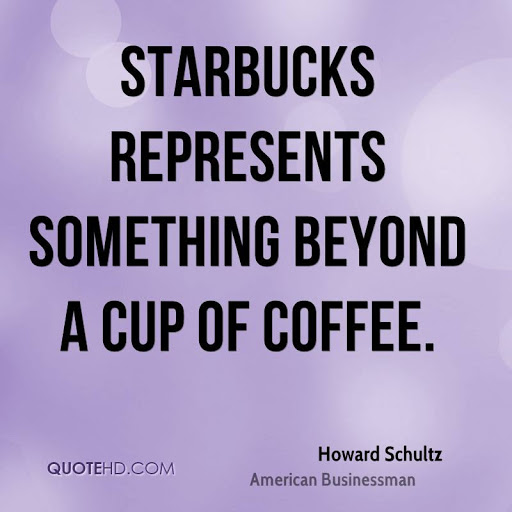

# Starbucks drinks nutrition

Nowadays, wherever you go, there is always a green logo shining by the street, Starbucks, is getting into our life, more than just a cup of coffee.

It is so convenient to stop by at Starbucks, grab a drink for breakfast and start a wonderful day. Beyond convenient, starbucks care about nutritions in your food as well. How much calories do you get in a Starbucks drink?

Today, we will check the nutrition chart of Starbucks drinks and analysis how can we take Starbucks in a healthy way.

## 1. read in data

In [1]:
#1. load in data and import packages
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
file = 'starbucks_drinkMenu_expanded.csv'
df = pd.read_csv(file)

## first, take a brief look at the data quality

In [3]:
df.head(10)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75
9,Classic Espresso Drinks,Caffè Latte,Soymilk,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10%,0%,30%,15%,75


In [4]:
df.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

#### Overall, there are 17 columns. What kind of fix we need to do with our data?

1. convert data type
    among 9 object type columns, there are 6 of them can be converted to numerical data.
    For the other 3 columns, Beverage_category, Beverage, Beverage_prep, we would generate dummy features to simplify our data.
2. missing value
    only one column 'Caffeine' has missing value we need to fill in. 


Let's get started.
Firstly, why are these nutrition columns' types are object?

In [6]:
df[' Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

There is a typo '3 2' we need to fix.

In [7]:
df[' Total Fat (g)'] = df[' Total Fat (g)'].replace('3 2', '3.2')
df[' Total Fat (g)'] = df[' Total Fat (g)'].astype('float')

In [8]:
df[' Total Fat (g)'].dtype

dtype('float64')

In [9]:
df['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', nan, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

In [10]:
df['Caffeine (mg)'] = df['Caffeine (mg)'].replace('3 2', '3.2').replace('Varies', np.nan).replace('varies', np.nan)
df['Caffeine (mg)'] = df['Caffeine (mg)'].astype('float')
df_caffiene_mean = np.mean(df['Caffeine (mg)'])
df['Caffeine (mg)'] = df['Caffeine (mg)'].fillna(df_caffiene_mean)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    float64
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [12]:
df1 =df
for col in df.columns:
    if '%' in col: 
        df1[col] = df[col].str.replace('%','')
        df1[col] = df1[col].astype('float')

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    float64
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    float64

In [14]:
#df2 = pd.get_dummies(df1, columns = ['Beverage_category', 'Beverage', 'Beverage_prep'])

In [15]:
df1['Beverage_name_combine'] = df1['Beverage']+' '+df1['Beverage_prep']

In [16]:
df1.sample(10)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Beverage_name_combine
152,Tazo® Tea Drinks,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),2% Milk,230,5.0,2.5,0.2,20,125,38,0,38,9.0,15.0,0.0,30.0,0.0,0.000000,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos...
56,Classic Espresso Drinks,Espresso,Solo,5,0.0,0.0,0.0,0,0,1,0,0,0.4,0.0,0.0,0.0,0.0,75.000000,Espresso Solo
82,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,370,10.0,5.0,0.0,0,220,56,1,51,13.0,10.0,2.0,45.0,15.0,150.000000,White Chocolate Mocha (Without Whipped Cream) ...
139,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Venti Nonfat Milk,190,0.2,0.1,0.0,5,110,39,0,39,9.0,15.0,0.0,30.0,0.0,89.520548,Tazo® Full-Leaf Tea Latte Venti Nonfat Milk
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,2.0,0.0,410.000000,Brewed Coffee Venti
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0.0,0.0,0.0,0,25,89,0,83,0.0,0.0,0.0,0.0,0.0,0.000000,Caramel Apple Spice (Without Whipped Cream) Venti
113,Tazo® Tea Drinks,Tazo® Chai Tea Latte,2% Milk,240,4.5,2.0,0.1,20,115,45,0,42,8.0,10.0,0.0,25.0,2.0,95.000000,Tazo® Chai Tea Latte 2% Milk
167,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Grande,80,0.0,0.0,0.0,0,0,21,0,21,0.0,0.0,0.0,0.0,0.0,89.520548,Shaken Iced Tazo® Tea (With Classic Syrup) Grande
229,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,140,39,0,38,3.0,6.0,6.0,10.0,2.0,0.000000,Strawberries & Crème (Without Whipped Cream) T...
210,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,220,4.0,2.5,0.0,0,170,45,1,42,3.0,4.0,0.0,10.0,20.0,75.000000,Java Chip (Without Whipped Cream) Soymilk


Now we can do some analysis with it. 

## 2. EDA
### 1. which kind of beverage has the highest calories

[Text(0, 0, 'Tazo® Tea'),
 Text(0, 0, 'Brewed Coffee'),
 Text(0, 0, 'Espresso'),
 Text(0, 0, 'Caffè Americano'),
 Text(0, 0, 'Shaken Iced Tazo® Tea (With Classic Syrup)'),
 Text(0, 0, 'Cappuccino'),
 Text(0, 0, 'Iced Brewed Coffee (With Classic Syrup)'),
 Text(0, 0, 'Skinny Latte (Any Flavour)'),
 Text(0, 0, 'Iced Brewed Coffee (With Milk & Classic Syrup)'),
 Text(0, 0, 'Caffè Latte'),
 Text(0, 0, 'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)'),
 Text(0, 0, 'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)'),
 Text(0, 0, 'Tazo® Full-Leaf Tea Latte'),
 Text(0, 0, 'Caramel'),
 Text(0, 0, 'Mocha'),
 Text(0, 0, 'Caramel Macchiato'),
 Text(0, 0, 'Vanilla Latte (Or Other Flavoured Latte)'),
 Text(0, 0, 'Tazo® Chai Tea Latte'),
 Text(0, 0, 'Vanilla Bean (Without Whipped Cream)'),
 Text(0, 0, 'Caffè Mocha (Without Whipped Cream)'),
 Text(0, 0, 'Coffee'),
 Text(0, 0, 'Java Chip'),
 Text(0, 0, 'Hot Chocolate (Without Whipped Cream)'),
 Text(0, 0, 'Caramel Apple Spice (Without Whipped Cream

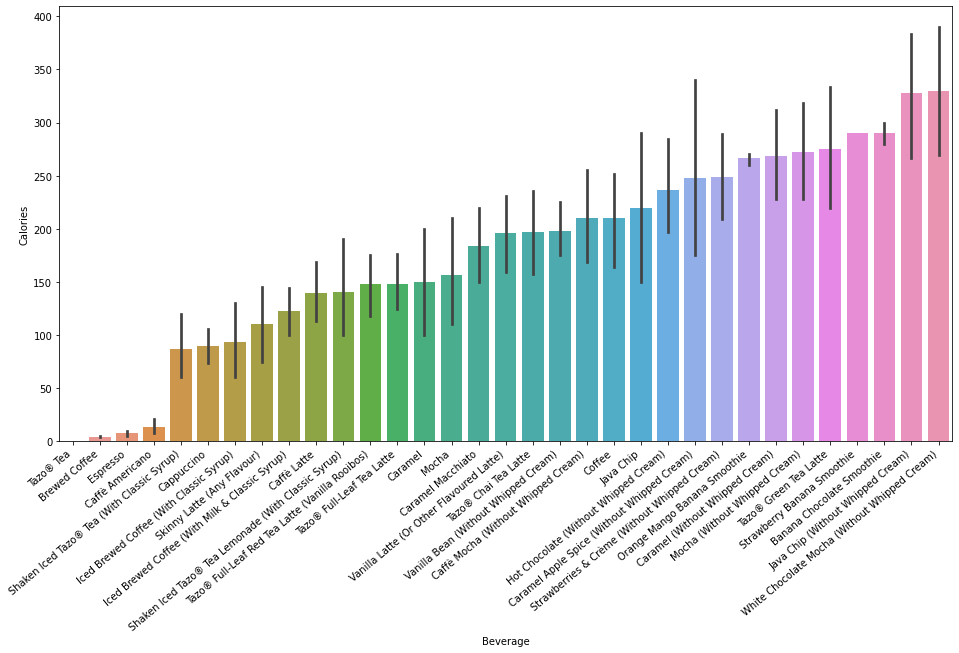

In [17]:
df1_sorted = df1.groupby(['Beverage'])['Calories'].aggregate(np.mean).reset_index().sort_values('Calories')
plt.figure(figsize = (16,8))
ax = sns.barplot(x='Beverage', y = 'Calories', data = df1, order= df1_sorted['Beverage'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

Original tea and coffee drinks barely has calories.
Any beverages developed from basic tea or coffee has at least 30 times more calories!

But we can't deny the taste added drinks are more yummy than the bitter coffee. So what could be the healthiest choice among all beverages? Next, we will look into top 10 less calories drinks besides coffee.

In [18]:
df1_sorted2 = df1.sort_values('Calories')
df1_sorted2_more_calories = df1_sorted2[~df1_sorted2['Beverage'].isin(['Tazo® Tea','Brewed Coffee','Espresso','Caffè Americano'])]

Here is a list of drinks that calories are less than 100, but also tasty. 

In [19]:
df1_sorted2_more_calories[df1_sorted2_more_calories['Calories']<100][['Beverage_name_combine', 'Calories']]

,Beverage_name_combine,Calories
46,Cappuccino Soymilk,50
44,Cappuccino Short Nonfat Milk,50
58,Skinny Latte (Any Flavour) Short Nonfat Milk,60
47,Cappuccino Tall Nonfat Milk,60
166,Shaken Iced Tazo® Tea (With Classic Syrup) Tall,60
154,Iced Brewed Coffee (With Classic Syrup) Tall,60
49,Cappuccino Soymilk,70
6,Caffè Latte Soymilk,70
4,Caffè Latte Short Nonfat Milk,70
144,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos...,80


From the list above, we saw that what kind of milk added affect the calories. Let's check Cappuccino for example.

### 2. How does the type of milk added matter?

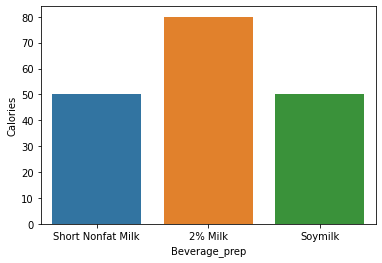

In [20]:
df1_cappuccino = df1[df1['Beverage'].isin(['Cappuccino'])]
df1_cappuccino_short = df1_cappuccino.iloc[0:3,:]
sns.barplot(x = 'Beverage_prep', y = 'Calories', data = df1_cappuccino_short)

whole milk data is not included in this chart, among all other options, nonfat milk and soymilk are more healthy than 2% milk.

### 3. How does the size matter?

In [21]:
df1_cappuccino_size = df1_cappuccino[df1_cappuccino['Beverage_prep'].str.contains('Nonfat')]

In [22]:
df1_cappuccino_size['Calories difference_with_short_cup'] = df1_cappuccino_size['Calories'] - 50
df1_cappuccino_size['Calories difference_percent'] = df1_cappuccino_size['Calories difference']/50*100
df1_cappuccino_size[['Beverage_prep', 'Beverage_name_combine', 'Calories', 'Calories difference_with_short_cup','Calories difference_percent']]


/Users/Sue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


KeyError: 'Calories difference'

In [ ]:
#ax = sns.barplot(x = 'Beverage_prep', y = 'Calories', data = df1_cappuccino_size)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

From this, we learned that, among healthy options, nonfat milk and soymilk are healthier than 2% milk. Beverages in Venti cups may double calories and even with healthy milk added, calorie would be more than 100.

The last question I am curious about Starbucks menu is, what is the nutrition table look like for the most fatty drink?
### 4. How does the nutrition table look like for the highest Calories drink?

In [ ]:
print('drink with the highest Calories')
df1_sorted2.iloc[-1,:]

In [ ]:
#categories and number of categories
categories = []
#categories = ['Calories',' Total Fat (g)', 'Trans Fat (g)','Saturated Fat (g)', ' Sodium (mg) ',' Total Carbohydrates (g)','Cholesterol (mg)',' Dietary Fibre (g)',' Sugars (g)',' Protein (g)','Vitamin A (% DV)','Vitamin C (% DV)',' Calcium (% DV)','Iron (% DV)','Caffeine (mg)']
#N = len(categories)

maximum = []
for col in df1.columns :
    if type(np.max(df1[col])) is not str:
        categories.append(col)
        maximum.append(np.max(df1[col]))
max_nutrition = pd.DataFrame(np.array(maximum).reshape(-1,len(maximum)), columns = categories)

In [ ]:
maximum_percent = []
for col in df1.columns :
    if type(np.max(df1[col])) is not str:
        maximum_percent.append(df1_sorted2.iloc[-1,:][col]/max_nutrition[col])
        
max_nutrition_percent = pd.DataFrame(np.array(maximum_percent).reshape(-1,len(maximum_percent)), columns = categories)

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = plt.subplot(polar = 'True')

N = len(categories)

#values and angles

values = max_nutrition_percent.values.tolist()[0]
values += values[:1]


angles = [n/float(N)*2*np.pi for n in range(N)]
angles += angles[:1]

#plot
plt.polar(angles,values,marker='.')
plt.fill(angles, values, alpha = 0.3)

# x and y ticks
plt.suptitle('Nutrition map of White Chocolate Mocha (Without Whipped Cream) with 2% Milk\n compared with maximum nutrition ingredient in Starbucks menu', fontsize = 18)
plt.xticks(angles[:-1], categories)

#ax.set_r_label_position(0)
plt.set_rotation(0)
plt.yticks([10,20,30,40,50,60,70,80,90], color = 'grey', size = 1)
plt.ylim(0,100)

plt.show()

The highest calorie beverage, White Chocolate Mocha (Without Whipped Cream) with 2% Milk, has the highest Fat, sugar, Cholesterol, comparing with all Starbucks drinks, and it barely has any fibre or Vitamin C.
It might be a good choise in cold winter, which could definately give you powerful energy, but not an everyday drink.

## Summary
With the Starubucks drink data, we now have answers for our curious questions:
1. which kind of beverage has the highest calories

Original tea and coffee doesn't contain much Calories, but any drinks with tasty ingradients added has higher energy.
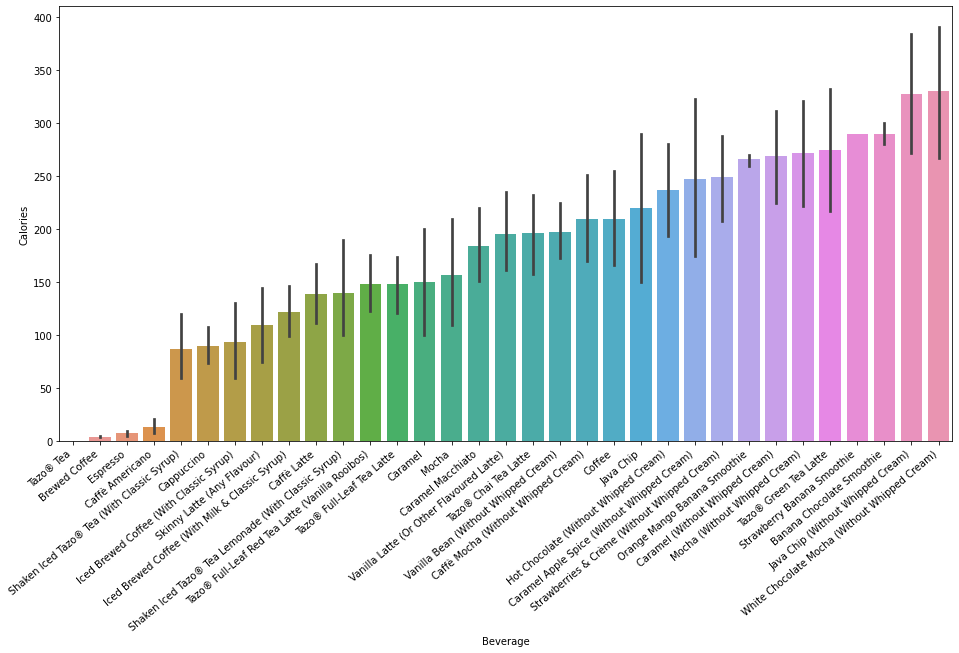
2. How does the type of milk added matter?

Among healthy choices, 2% milk has higher Calories than the other two.
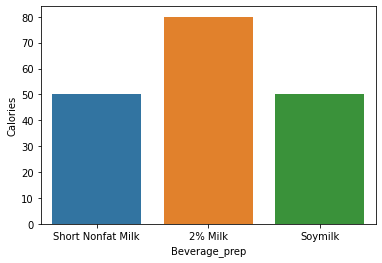
3. How does the size matter?

Venti cup even double up the Calories compared with short cup.
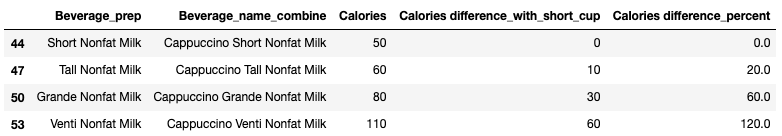
4. How does the nutrition table look like for the highest Calories drink?

The highest Calories drink is white Chocolate Mocha with 2% Milk, which has 510kCal. It has the highest Fat, sugar and Cholesterol within all Starbucks drinks.
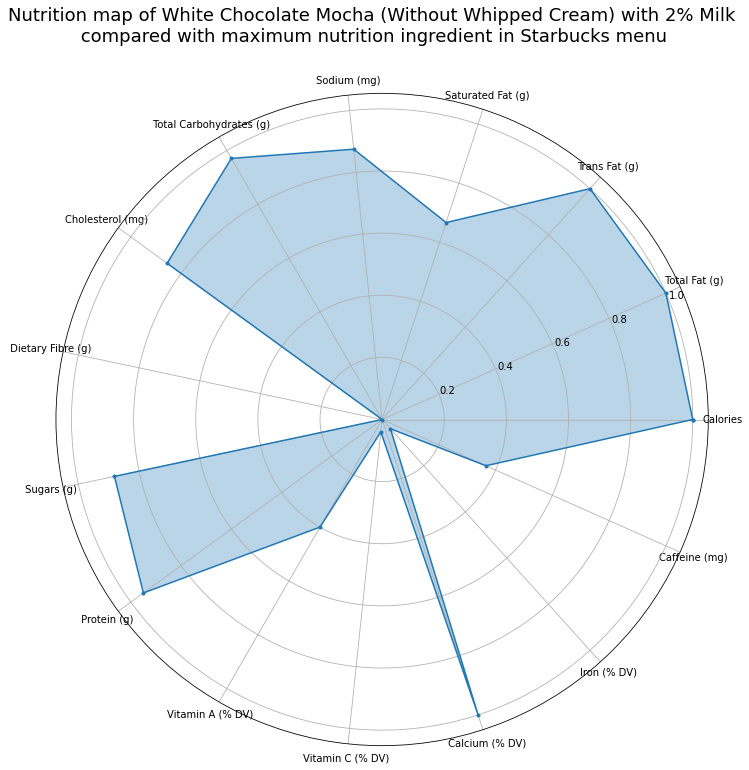